# Monte Carlo Simulations as a Decision Making Tool
Multiple probability simulation
Monte Carlo simulations are used to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables. It is a technique used to understand the impact of risk and uncertainty in prediction and forecasting models (Ref: https://www.investopedia.com/terms/m/montecarlosimulation.asp)
Observing different realizations of a future event (Scenario1, Scenario2, ScenarioX)

We calculate future data's mean and variance values

A larger data set with fictional data
Good proxy of different outcomes
Used for many purposes: pricing, risk, etc.
Monte Carlo in Corporate Finance
currentRevenues = lastYearRevenues * (1 + growthRateOfRevenues)

In this formula, lastYearRevenue is availavle
Variable is growthRateOfRevenues
-> We can run 1,000 simulations of growthRateOfRevenues
-> Then get the idea of "Average", "Maximum" and "Minimum" values
Example: For corporate finance, monte carlo can allow us to forecast:

Revenues, Cogs and Operating Profit

# Goal: Predict the firm's future gross profit
# Requirements:
#   Expected revenue
#   Expected COGS (Cost of Goods Sold)
# Solution:
#   Perform 1,000 simulations of the company's expected revenues




In [1]:
import numpy as np
import matplotlib.pyplot as plt

# values are in million $ (x1000,000)
rev_m = 170     # revenue mean. expected revenue for this year
rev_stdev = 20  # standard deviation of the expected revenue of this year

iterations = 1000 # number of simulations
# future of revenues 
rev = np.random.normal(rev_m, rev_stdev, iterations)
rev

array([165.54138611, 147.65635708, 141.12069595, 180.17307825,
       184.17465408, 175.34374726, 155.63996129, 195.37462532,
       171.46971456, 153.42475116, 168.6651297 , 189.43562166,
       170.92585678, 184.21819903, 144.33337257, 158.13807278,
       189.49134833, 185.80804751, 182.37836279, 154.6784794 ,
       179.91936312, 166.59926369, 146.40202112, 193.87383292,
       195.27433339, 153.86495658, 168.32111113, 168.44478454,
       155.08163534, 165.8893836 , 161.69207379, 182.56207152,
       166.3588105 , 169.69807527, 188.37357538, 228.12799549,
       141.69145666, 149.22130805, 151.16853622, 150.09397226,
       200.52523424, 157.19513057, 163.9896757 , 144.82619973,
       147.80597704, 168.69995758, 164.12521347, 170.8842754 ,
       167.13996614, 191.4571879 , 172.90684496, 171.39382359,
       186.99356144, 182.79796757, 165.95783503, 172.65786419,
       152.50259852, 195.81824094, 217.77322901, 196.85323364,
       175.05861268, 162.08388826, 109.73669859, 149.75

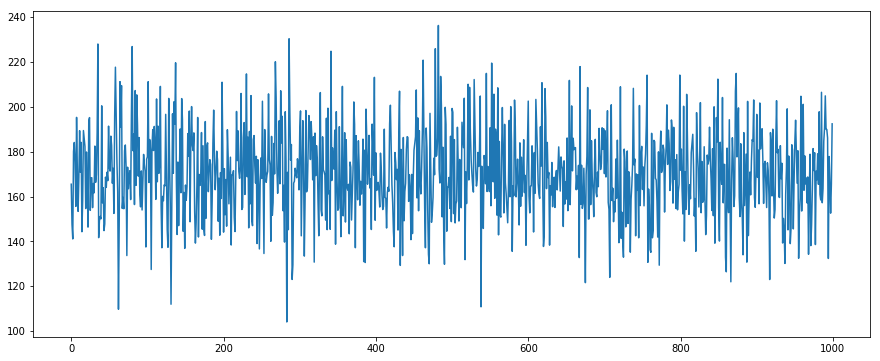

In [2]:
# check the distributions
plt.figure(figsize=(15,6))
plt.plot(rev)
plt.show()

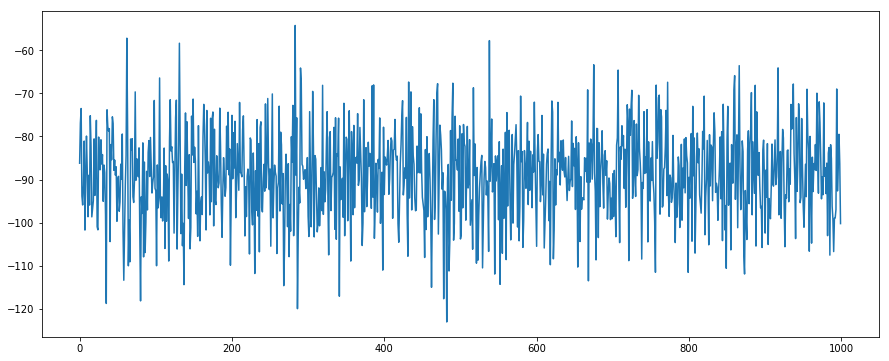

In [3]:
# Estimated percentage of COGS : ~60% of the revenues 
# also, standart deviation is selected 0.1
COGS = - (rev * np.random.normal(0.6, 0.1)) # - because COGS is money spent
plt.figure(figsize=(15,6))
plt.plot(COGS)
plt.show()

In [4]:
COGS.mean() # naturally we will get a different value everytime if we re-run abov

-88.9393603475015

In [5]:
COGS.std()

10.380046378613644

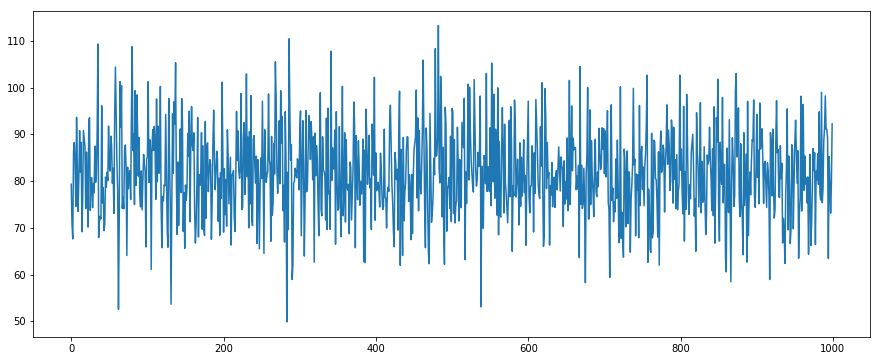

In [6]:
GrossProfit = rev + COGS

plt.figure(figsize=(15,6))
plt.plot(GrossProfit)
plt.show()

In [7]:
print ("Max Gross Profit: %f" % max(GrossProfit))
print ("Min Gross Profit: %f" % min(GrossProfit))
print ("Mean Gross Profit: %f" % GrossProfit.mean())
print ("Standard Deviation: %f" % GrossProfit.std())

Max Gross Profit: 113.279531
Min Gross Profit: 49.862613
Mean Gross Profit: 81.831759
Standard Deviation: 9.550524


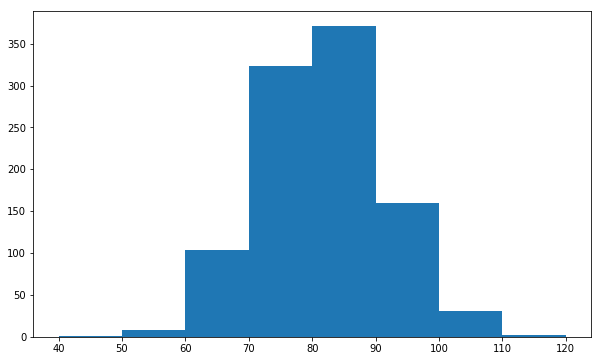

In [8]:
#show the distribution of output using histogram
plt.figure(figsize=(10,6))
# here we are specifying the bins
plt.hist(GrossProfit, bins = [40, 50, 60, 70, 80, 90, 100,110, 120])
plt.show()

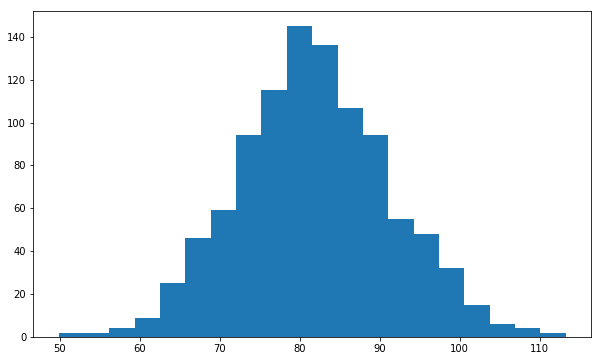

In [9]:
# OR 
plt.figure(figsize=(10,6))
plt.hist(GrossProfit, bins = 20) # we are asking to have 20 bins
plt.show()

# Forecasting Stock Prices with Monte Carlo Simulation
$priceToday = priceYesterday * e^r$

r : log return of share price between yesterday and today
$ln(priceToday/priceYesterday)$
Check this for more details: https://towardsdatascience.com/stock-price-prediction-intervals-using-monte-carlo-simulation-6b52b8ac9c27



In [10]:
import numpy as np
import pandas as pd 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm 
%matplotlib inline

In [11]:
ticker = 'MSFT'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-1-1')['Adj Close']

In [12]:
# pandas.pct_change() : obtains simple returns from a provided dataset
logReturns = np.log(1 + data.pct_change())
logReturns.tail()

,MSFT
Date,
2020-09-28,0.007765
2020-09-29,-0.010463
2020-09-30,0.014704
2020-10-01,0.010076
2020-10-02,-0.029956


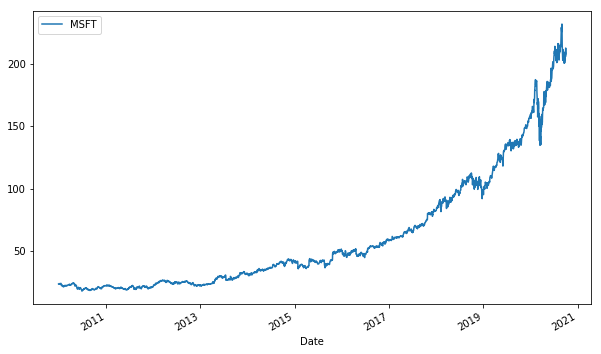

In [13]:
data.plot(figsize=(10,6))

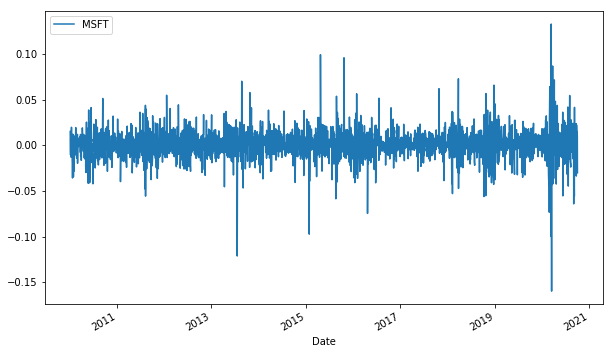

In [14]:
logReturns.plot(figsize=(10,6))

In [15]:
u = logReturns.mean() 
var = logReturns.var()

print('Mean: %f' % u)
print('Variance: %f' % var)

Mean: 0.000798
Variance: 0.000256


In [16]:
# we won't annualize, we will predict MSFT's daily stock price
drift = u - (0.5 * var)
print('Drift : %f' % drift)

Drift : 0.000670


In [17]:
stdev = logReturns.std()
print ('Standard Deviation: %f' % stdev)

Standard Deviation: 0.015992


# Brownian motion

Brownian motion is a widely used mathematical model for asset prices with the assumption of their constant volatilities
(Ref: https://www.sciencedirect.com/topics/engineering/geometric-brownian-motion )

It is technically a Markov process. This means the stock price follows a random walk and is consistent with
(at the very least) the weak form of the efficient market hypothesis (EMH)—past price information is already incorporated, 
and the next price movement is "conditionally independent" of past price movements 
(Ref: https://www.investopedia.com/articles/07/montecarlo.asp)



In [18]:
# type should be panda series (pandas.core.series.Series)
print("drift's type: %s" % type(drift))
print("stdev's type: %s" % type(stdev))

drift's type: <class 'pandas.core.series.Series'>
stdev's type: <class 'pandas.core.series.Series'>


In [19]:
# Convert to numpy arrays
np.array(drift) # we can use numpy.array 
stdev.values # or we can just use .values this will convert the object to numpy array

array([0.01599152])

In [20]:
# z corresponds to the distance between the mean and 
#    the events, expressed as the number of standard deviations
# norm.pppf is part of scipy.stats.. 
#    https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html 

z = norm.ppf(np.random.rand(10,2))
z

array([[ 7.62470478e-01,  9.82669289e-01],
       [ 2.69263359e+00, -1.38785910e+00],
       [ 1.05601652e+00, -4.38146151e-01],
       [-4.88425118e-01,  1.07206597e+00],
       [ 2.27713890e+00,  6.52045520e-01],
       [-1.20394045e+00,  6.80430214e-01],
       [ 6.43762402e-05, -1.15963283e+00],
       [ 1.15928051e+00,  9.63871829e-01],
       [ 8.82874701e-01, -4.47664505e-01],
       [ 4.32993634e-01,  1.00508388e+00]])

In [21]:
timeIntervals = 1000# like 1000 days
iterations = 10

In [22]:
dailyReturns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(timeIntervals, iterations)))
dailyReturns

array([[1.00264948, 1.01564894, 0.99551162, ..., 0.99802592, 1.01919542,
        0.9900556 ],
       [0.99530869, 1.02011339, 0.98537644, ..., 1.02347511, 0.98500553,
        1.02060156],
       [0.97577305, 0.97417487, 0.98486419, ..., 1.00314389, 0.99044155,
        1.04108141],
       ...,
       [0.99871262, 1.00758667, 0.97948539, ..., 0.98322478, 1.01912044,
        1.01963133],
       [0.97335861, 0.99514046, 0.99493377, ..., 0.99910369, 1.01317255,
        1.01018096],
       [0.98955222, 1.00307626, 0.96965338, ..., 1.00148467, 0.96545888,
        0.99924824]])

In [23]:
# dailyReturn is available from the previous calculation
# S0 is missing, which is the current market price of the stock
S0 = data.iloc[-1]  # get the latest price in the list 
S0

MSFT    206.190002
Name: 2020-10-02 00:00:00, dtype: float64

In [24]:
# create a new list with the size (1000 x 10) of dailyReturns with 0 values
priceList = np.zeros_like(dailyReturns) # this will be filled with the stock prices

In [25]:
priceList[0] = S0 # setting all the values in the first row
priceList

array([[206.19000244, 206.19000244, 206.19000244, ..., 206.19000244,
        206.19000244, 206.19000244],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [26]:
for t in range(1, timeIntervals):
    priceList[t] = priceList[t-1] * dailyReturns[t]

In [27]:
priceList

array([[206.19000244, 206.19000244, 206.19000244, ..., 206.19000244,
        206.19000244, 206.19000244],
       [205.22270115, 210.33718251, 203.17476975, ..., 211.03033628,
        203.09829174, 210.43783846],
       [200.25078173, 204.90519835, 200.09955541, ..., 211.69379159,
        201.15698641, 219.08292146],
       ...,
       [472.84529032, 182.18569956, 387.68914214, ..., 137.54992103,
        286.42828399, 603.09637342],
       [460.24803492, 181.30036019, 385.72501992, ..., 137.42663345,
        290.2012759 , 609.23647484],
       [455.43946324, 181.85808725, 374.01957061, ..., 137.63066622,
        280.17739955, 608.77847503]])

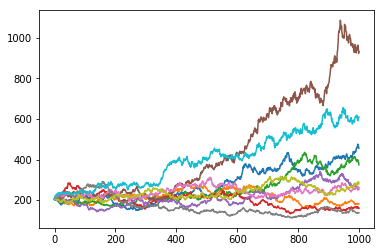

In [28]:
plt.plot(priceList)
plt.show()

# Derivatives
Summary
A financial instrument, whose price is derived based on the development of one or more underlying assets (stocks, bonds, interest rates, commodities, exchange rates)

The derivative itself is a contract between two or more parties, and the derivative derives its price from fluctuations in the underlying asset. (Ref: https://www.investopedia.com/terms/d/derivative.asp).

A contract involving at least two parties describing how they will echange payments.

Trading derivatives

Regulated markets (Has a uniform contractual structure, easier the understand)
OTC - Over The Counters
Three distinguish people dealing with derivatives:

Hedging : People interested in hedging their investments
Speculating : Speculators
Aribtrageurs :
Types of Derivatives
Options

Enables its ownder to buy or sell an underlying asset at a given price (also known strike price)
Can be exercised until a certain date
Call Options : Option to buy an asset
Put Option: Option to seel an asset
Forwards

Two parties agree that one party will sell to the other an underlying asset at a future point of time
Sample: Corn producer, makes a contract with buyer before corns are ready to be harvested, locks the price earlier..
Futures

Highly standardized forward contracts
Difference with Forards: Transaction goes through the market places, counter parties do not know each other. Level of standardization is different
Swaps

Two parties agree to echange cash flows based on an underlying asset at a future point of time
Underlying asset can be
Interest rate
Stock Price
Bond Price
Commodity
Calculating Call Options by using The Black Scholes Merton (BSM) framework
Used to price an Options contract. In particular, the model estimates the variation over time of financial instrument (Ref: Investopedia

Call Option Formula: Calculated by multiplying the stock price by the cumulative standard normal probability distribution function

Formula: https://www.investopedia.com/terms/b/blackscholes.asp#:~:text=The%20Black%20Scholes%20Formula,-The%20mathematics%20involved&text=The%20Black%20Scholes%20call%20option,standard%20normal%20probability%20distribution%20function.

Monte Carlo : Black Scholes Merton


In [29]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm

In [30]:
# S : current stock price
# K : strike price
# r : risk free rate
# stdev : standard deviation
# T : time horizon (years)
def d1(S,K,r,stdev,T):
    return (np.log(S / K) + (r + stdev ** 2 /2 ) * T) / (stdev * np.sqrt(T))

# difference with d1, r - stdev..
def d2(S,K,r,stdev,T):
    return (np.log(S / K) + (r - stdev ** 2 /2 ) * T) / (stdev * np.sqrt(T))

In [31]:
# We will use cumulative distribution
#   shows how the data accumulates in time
#   result never will be less than 0 or greater than 1
# example calls
print(norm.cdf(0))
print(norm.cdf(0.25))
print(norm.cdf(0.75))
print(norm.cdf(9))

0.5
0.5987063256829237
0.7733726476231317
1.0


In [32]:
def BSM(S, K, r, stdev, T):
    return (S * norm.cdf(d1(S,K,r,stdev,T))) - (K * np.exp(-r * T) * norm.cdf(d2(S,K,r,stdev,T)))

In [33]:
ticker = 'MSFT'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2015-01-01', end='2019-12-31')['Adj Close']

In [34]:
S = data.iloc[-1] # get current stock price
logReturns = np.log(1 + data.pct_change())
stdev = logReturns.std() * 250 ** 0.5 
S

MSFT    156.455429
Name: 2019-12-31 00:00:00, dtype: float64

In [35]:
r = 0.025  # Risk free rate - US 10 year government bond on BBG (bloomberg)
K = 175.0  # Strike price
T = 1 # time horizon - years

In [36]:
# Calculate call option price
BSM(S,K,r,stdev,T)

MSFT    9.012561
Name: 2019-12-31 00:00:00, dtype: float64

In [37]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
ticker = 'MSFT'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2015-01-01', end='2019-12-31')['Adj Close']

In [39]:
logReturns = np.log(1 + data.pct_change())

In [40]:
r = 0.25 # risk free rate (US Bond 10y)
K = 175.0

In [41]:
stdev = (logReturns.std() * 250 ** 0.5).values # use values to conver to array

In [42]:
T = 1.0
timeIntervals = 250
deltaT = T / timeIntervals
iterations = 10000

In [43]:
Z = np.random.standard_normal((timeIntervals + 1 , iterations))
S = np.zeros_like(Z)
S[0] = data.iloc[-1]  # first row with current (last) price

In [44]:
for t in range(1, timeIntervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * deltaT + stdev * deltaT ** 0.5 * Z[t])

In [45]:
S

array([[156.45542908, 156.45542908, 156.45542908, ..., 156.45542908,
        156.45542908, 156.45542908],
       [157.05050718, 155.59811404, 155.22718221, ..., 154.20186665,
        156.16212826, 156.08362603],
       [155.10731606, 153.97526999, 155.77423449, ..., 153.35668249,
        156.97136509, 156.66371152],
       ...,
       [159.56641767, 240.06014962, 180.94869715, ..., 160.15361213,
        221.37775893, 313.10194081],
       [159.15886293, 240.21259781, 182.83099815, ..., 157.50190962,
        220.16241641, 318.89410778],
       [159.08952751, 231.21763403, 185.30014012, ..., 164.43224836,
        220.42285676, 307.59011518]])

In [46]:
S.shape

(251, 10000)

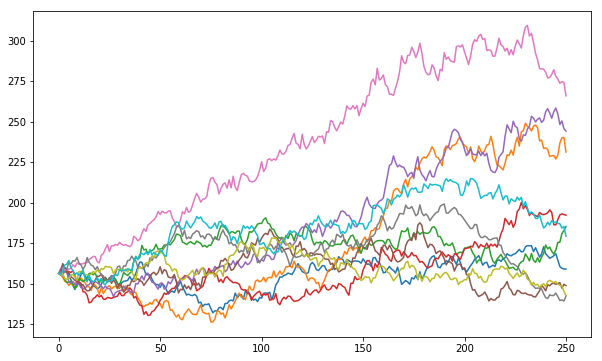

In [47]:
plt.figure(figsize=(10,6))
plt.plot(S[:,:10])
plt.show()

In [48]:
# numpy.maxium : creates an array contains either 0s or 
# the numbers of equal to the differences
payoff = np.maximum(S[-1] - K, 0) 
payoff

array([  0.        ,  56.21763403,  10.30014012, ...,   0.        ,
        45.42285676, 132.59011518])

In [49]:
payoff.shape # this is same lenght as the S matrix

(10000,)

In [50]:
callOptionPrice = np.exp(-r * T) * np.sum(payoff) / iterations
callOptionPrice

26.138593327024488